# Homework 5

In [1]:
# Import the necessary packages from sci-kit learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import vq # Specifically uesful for K-means clustering
from sklearn import cluster  # Clustering algorithms such as K-means and agglomerative
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.manifold import MDS #Import the multidimensional scaling module
from scipy.spatial.distance import squareform #Import squareform, which creates a symmetric matrix from a vector
import time
import math

from scipy import stats

In [2]:
data = pd.read_csv('wines.csv')
print(data.shape)

(178, 13)


array([[<AxesSubplot:xlabel='Alcohol', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Malic_Acid', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Ash', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Ash_Alkalinity', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Magnesium', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Total_Phenols', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Flavonoids', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Stilbenes', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Proanthocyanins', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Color_Intensity', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Hue', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='OD280', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Proline', ylabel='Alcohol'>],
       [<AxesSubplot:xlabel='Alcohol', ylabel='Malic_Acid'>,
        <AxesSubplot:xlabel='Malic_Acid', ylabel='Malic_Acid'>,
        <AxesSubplot:xlabel='Ash', ylabel='Malic_Acid'>,
        <AxesSubplot:xlabel='Ash_A

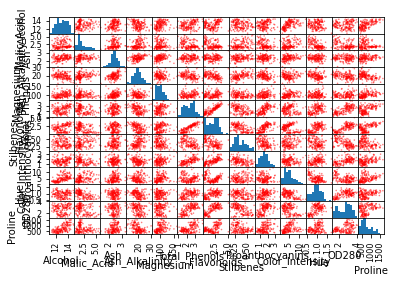

In [8]:
data = pd.DataFrame(data)
pd.plotting.scatter_matrix(data, s = 10, c= 'red')

In [ ]:
data

In [ ]:
data.corr()

In [ ]:
def normalization(d):
    dmax = max(d)
    dmin = min(d)
    return lambda x: (x-dmin)/(dmax-dmin)
to_normalize = ["Alcohol", "Malic_Acid", "Ash","Ash_Alkalinity", "Magnesium","Total_Phenols","Flavonoids","Stilbenes","Proanthocyanins","Color_Intensity","Hue","OD280","Proline"]

for f in to_normalize:
    data[f] = data[f].apply(normalization(data[f]))
    


In [ ]:
data

# Question 1

In [ ]:
X = data

print(type(X))

In [ ]:
target_names = data.index
print(type(target_names))
print(target_names.shape)

In [ ]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

In [ ]:
X_pca = pca.transform(X)

In [ ]:
target_ids = range(5)
plt.figure(figsize=(5, 5))
for i, c in zip(target_ids, 'rgbcmykw'):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
mu = np.mean(X, axis=0)
C = (X - mu).T @ (X - mu)
eigvals, eigvecs = np.linalg.eig(C)
print(eigvals)

# Question 2

# 

In [ ]:
X_embedded = TSNE(n_components=2, perplexity = 5).fit_transform(X)
X_embedded.shape

In [ ]:
target_ids = range(5)
plt.figure(figsize=(5, 5))
for i, c in zip(target_ids, 'rgbcmykw'):
    plt.scatter(X_embedded[:, 0], X_pca[:, 1], c=c)
plt.legend()
plt.show()

In [ ]:
X_embedded = TSNE(n_components=2, perplexity = 20).fit_transform(X)
X_embedded.shape

In [ ]:
target_ids = range(5)
plt.figure(figsize=(5, 5))
for i, c in zip(target_ids, 'rgbcmykw'):
    plt.scatter(X_embedded[:, 0], X_pca[:, 1], c=c)
plt.legend()
plt.show()

In [ ]:
X_embedded = TSNE(n_components=2, perplexity = 60).fit_transform(X)
X_embedded.shape

In [ ]:
target_ids = range(5)
plt.figure(figsize=(5, 5))
for i, c in zip(target_ids, 'rgbcmykw'):
    plt.scatter(X_embedded[:, 0], X_pca[:, 1], c=c)
plt.legend()
plt.show()

In [ ]:
X_embedded = TSNE(n_components=2, perplexity = 90).fit_transform(X)
X_embedded.shape

In [ ]:
target_ids = range(5)
plt.figure(figsize=(5, 5))
for i, c in zip(target_ids, 'rgbcmykw'):
    plt.scatter(X_embedded[:, 0], X_pca[:, 1], c=c)
plt.legend()
plt.show()

In [ ]:
X_embedded = TSNE(n_components=2, perplexity = 120).fit_transform(X)
X_embedded.shape

In [ ]:
target_ids = range(5)
plt.figure(figsize=(5, 5))
for i, c in zip(target_ids, 'rgbcmykw'):
    plt.scatter(X_embedded[:, 0], X_pca[:, 1], c=c)
plt.legend()
plt.show()

In [ ]:
X_embedded = TSNE(n_components=2, perplexity = 150).fit_transform(X)
X_embedded.shape

In [ ]:
target_ids = range(5)
plt.figure(figsize=(5, 5))
for i, c in zip(target_ids, 'rgbcmykw'):
    plt.scatter(X_embedded[:, 0], X_pca[:, 1], c=c)
plt.legend()
plt.show()

In [ ]:
kl =[]
for i in range(5, 151, 5):
    kl.append(TSNE(n_components=2, perplexity = i).kl_divergence_)

In [ ]:
x = np.array(X)
print(x)

In [ ]:
x

# Question 3

In [ ]:
mds = MDS(n_components=2, n_init=100, max_iter = 10000) #Create the mds object
#Components: Looking for a 2D solution, n_init: Number of runs with random initial starting positions, max_iter: Max number of iterations per run, dissimilarity: We already did it, from out distance matrix, 
mdsSolution = mds.fit_transform(X) #Actually run the mds

In [ ]:
plt.scatter(mdsSolution[:,0], mdsSolution[:,1], color='purple') #Making the plot, first 2 dimensions


plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()

print(mds.stress_) #How low could we get the stress? [Un-normalized]

# Question 4

In [ ]:
##### Import the packages
##### If not present: use !pip install [package_name]
from sklearn.datasets import make_blobs, fetch_openml
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.stats import multivariate_normal as normal # Multivariate Gaussian distributions
from sklearn import mixture  # Mixture models such as Gaussian Mixture Models
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy.cluster.hierarchy as sch
%matplotlib inline

In [ ]:
X = X_embedded

In [ ]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Question 5

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
db = DBSCAN(eps=0.09, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

In [ ]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()